# 3 Rice diseases prediction

#### Using tensorflow, keras

### Uncomment the following to download the packages

In [838]:
#Uncomment the following to download the packages
#!pip install joblib
#!pip install matplotlib
#!pip install tensorflow
#!pip install -U scikit-learn scipy
#!pip install tensorflow
#!pip install pandas

In [839]:
from pathlib import Path
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import csv
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
import joblib
import pickle

In [840]:
bacterial_leaf_path=Path("./images/Bacterial_leaf _blight/")
brown_spot_path=Path("./images/Brown_spot/")
leaf_smut_path=Path("./images/Leaf_smut/")



imagesToPredict=[]
imagesToPredictLabels=[]

diseases_dict_desc = []
disease_dict = []


# heads_dict_desc.append(1)
# heads_dict.append(np.array(convert_np))
# heads.append(csv_format_img)
        
def DiseaseFunc(dis):
    folder = dis["folder"]
    id = dis["id"]

    # Specify the pattern to match both jpg and JPG files
    pattern = f"images/{folder}/*.jpg"
    
    # Use glob to find files matching the pattern
    jpg_files = glob.glob(pattern)
    
    # If you want to include JPG files as well, add the pattern for JPG
    pattern_jpg = f"images/{folder}/*.JPG"
    
    jpg_files += glob.glob(pattern_jpg)
    
    
    # for leg in glob.glob(f"images/{folder}/*.jpg"):
    for leg in jpg_files:

        # Open the image here
        img = Image.open(str(leg))
        # Resize all images to 32 by 32 px dimension
        resized_im=img.resize((32,32)).convert('RGB')
        convert_np=np.array(resized_im)
        # format images 
        csv_format_img=[convert_np, f'{id}']
        #append the description to dict
        diseases_dict_desc.append(id)
        # convert the image to numpy 3d array and append to the list
        disease_dict.append(np.array(convert_np))
        
        


# for explanation on this , refer to the above code, but what we are doing here is to prepare the image that will be used to predict 

def imagesToPredictFn():
    for head in glob.glob("images/predict/*.JPG"):
        img = Image.open(str(head))
        resized_im=img.resize((32,32)).convert('RGB')
        convert_np=np.array(resized_im)
        csv_format_img=[convert_np, f'3']
        imagesToPredictLabels.append(3)
        imagesToPredict.append(np.array(convert_np))
        
        #plt.imshow(np.array(convert_np))
        #plt.show()
    

diseases = [
    {
        "id":0,
        "folder":"Bacterial_leaf _blight",
    },
    {
        "id":1,
        "folder":"Brown_spot",
    },
    {
        "id":2,
        "folder":"Leaf_smut",
    }
]

for idx,x in enumerate(diseases):
    
    DiseaseFunc(x)

imagesToPredictFn()



#Extract the training and test variables from the train_test_split
X_train, X_test, y_train, y_test = train_test_split(disease_dict, diseases_dict_desc, test_size=2, random_state=101, shuffle=True)


appData1=tuple(((np.array(X_train,dtype='uint8')),np.array(y_train,dtype='uint8')))
appData3=tuple(((np.array(X_test,dtype='uint8')),np.array(y_test,dtype='uint8')))


myAppData=((appData1),(appData3))

(train_images,train_labels),(test_images, test_labels)=myAppData
imagesToPredict= (np.array(imagesToPredict,dtype='uint8'))
imagesToPredictLabels= (np.array(imagesToPredictLabels,dtype='uint8'))
print(test_labels.dtype)
print("Length of train images is ",len(train_images))
print("Length of disease_dict images is ",len(disease_dict))

# disease_dict
class_names=["Bacterial_leaf _blight","Brown_spot","Leaf_smut","Unknown"]

uint8
Length of train images is  117
Length of disease_dict images is  119


In [841]:
disease_dict

[array([[[245, 236, 233],
         [245, 235, 233],
         [245, 236, 233],
         ...,
         [149, 149, 160],
         [148, 148, 158],
         [147, 147, 157]],
 
        [[245, 236, 233],
         [244, 236, 233],
         [244, 235, 233],
         ...,
         [150, 150, 160],
         [150, 150, 160],
         [149, 148, 159]],
 
        [[244, 236, 233],
         [245, 236, 233],
         [244, 236, 233],
         ...,
         [178, 176, 182],
         [152, 152, 161],
         [150, 150, 160]],
 
        ...,
 
        [[144, 144, 138],
         [142, 143, 137],
         [141, 142, 135],
         ...,
         [248, 241, 237],
         [248, 241, 237],
         [248, 241, 237]],
 
        [[218, 211, 203],
         [208, 201, 194],
         [205, 198, 192],
         ...,
         [245, 239, 235],
         [246, 239, 235],
         [245, 239, 235]],
 
        [[247, 241, 237],
         [248, 240, 237],
         [248, 241, 237],
         ...,
         [246, 239, 236],
  

In [842]:
train_labels

array([1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 1, 1, 0, 1, 1, 2, 2, 2, 1, 0, 0, 2,
       2, 2, 0, 2, 1, 0, 1, 0, 2, 0, 1, 2, 0, 1, 2, 2, 1, 2, 2, 2, 0, 2,
       1, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 2, 2, 2, 0, 0, 2,
       2, 2, 0, 1, 0, 2, 2, 0, 1, 1, 2, 0, 2, 0, 0, 1, 2, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 0, 2,
       1, 2, 1, 1, 2, 0, 2], dtype=uint8)

In [843]:

#print(np.array(train_images[7]))
test_labels

array([0, 1], dtype=uint8)

In [844]:
len(train_labels)

117

## Visualize

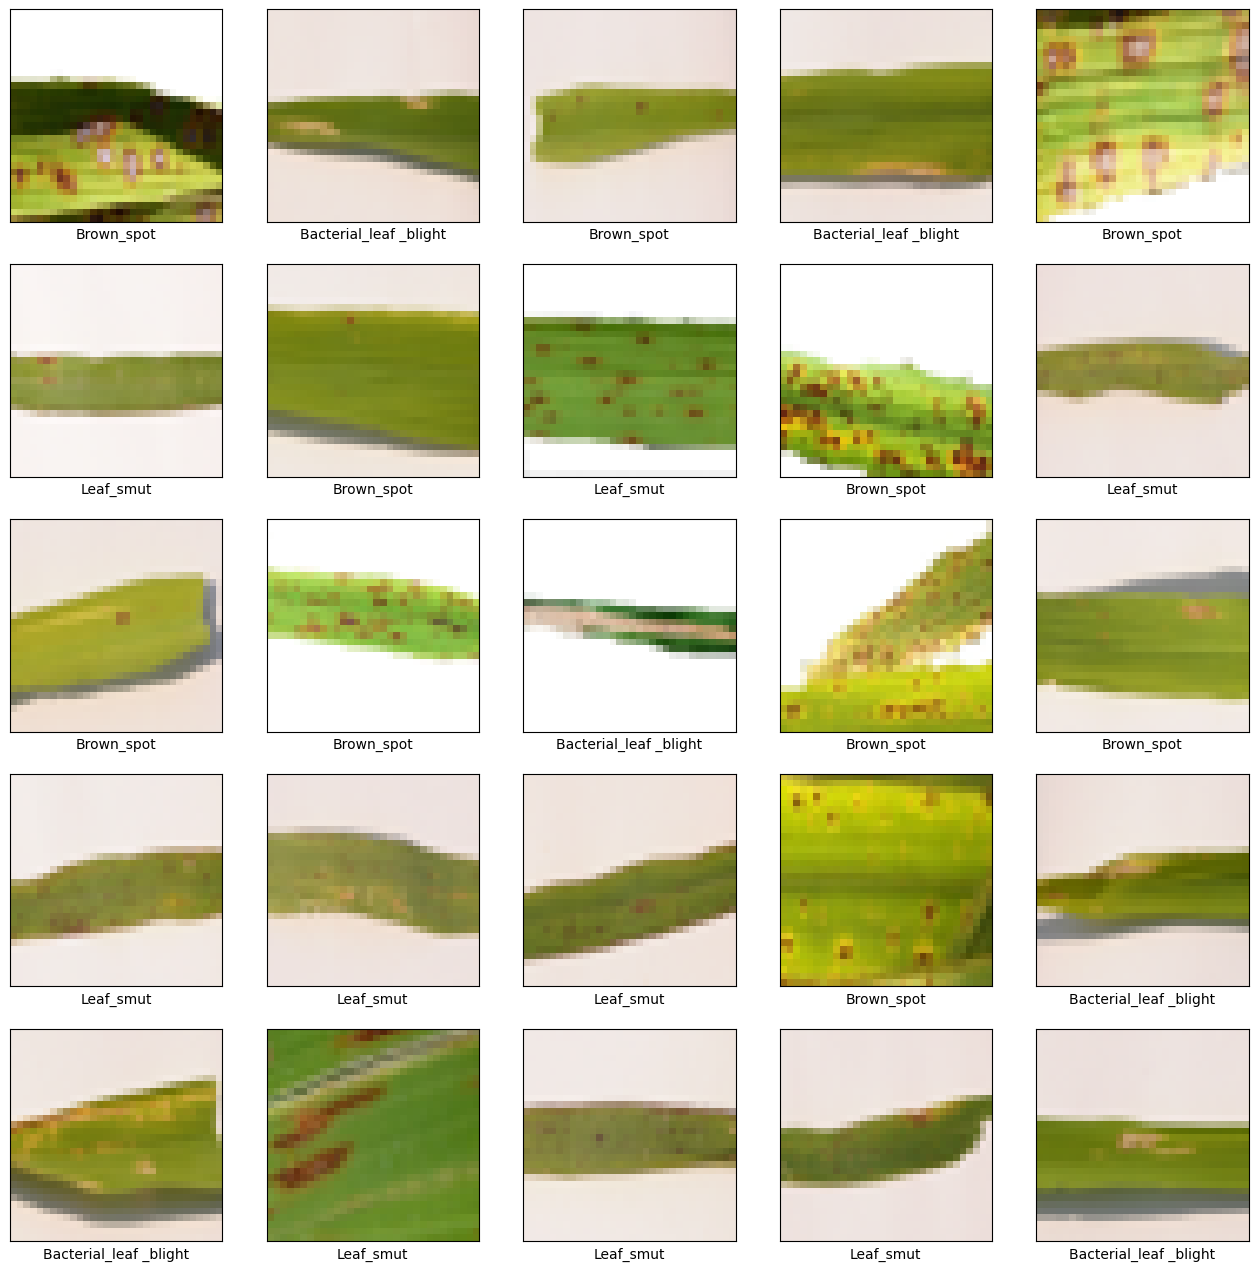

In [845]:
plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], )
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [846]:
from tensorflow.keras import datasets, layers, models

#This line initializes a Sequential model, which is a linear stack of layers. In Keras, the Sequential model allows you to create a neural network layer by layer in a step-by-step fashion.
model = models.Sequential()


#layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)): This creates a 2D convolutional layer with 32 filters, each with a 3x3 kernel size. The 'relu' activation function is applied element-wise. The input_shape=(32, 32, 3) specifies that the input should have a shape of 32x32 pixels with three color channels (RGB).
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

#This line adds a max-pooling layer to the model. Max-pooling is a downsampling operation that reduces the spatial dimensions of the input volume. In this case, it uses a 2x2 window to extract the maximum value, effectively reducing the size of the feature maps.
model.add(layers.MaxPooling2D((2, 2)))

#This line adds a second convolutional layer to the model. It has 64 filters with a 3x3 kernel and uses the 'relu' activation function
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

#This line adds another max-pooling layer, further reducing the spatial dimensions of the feature maps.
model.add(layers.MaxPooling2D((2, 2)))

#This line adds a third convolutional layer with 64 filters and a 3x3 kernel. The 'relu' activation function is applied.
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [847]:
model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_114 (Conv2D)         (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_76 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_115 (Conv2D)         (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_77 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_116 (Conv2D)         (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 563

In [848]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

# indicate how many classes of the layers
model.add(layers.Dense(4))

In [849]:
model.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_114 (Conv2D)         (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_76 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_115 (Conv2D)         (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_77 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_116 (Conv2D)         (None, 4, 4, 64)          36928     
                                                                 
 flatten_39 (Flatten)        (None, 1024)            

In [850]:
train_images

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[160, 177,  48],
         [161, 178,  45],
         [169, 186,  55],
         ...,
         [ 99,  65,  34],
         [119,  83,  37],
         [123, 103,  29]],

        [[205, 216,  99],
         [199, 209,  94],
         [188, 203,  83],
         ...,
         [141, 116, 107],
         [140, 104,  69],
         [170, 147,  63]],

        [[156, 135,  56],
         [132, 114,  41],
         [112, 102,  31],
         ...,
         [168, 130, 116],
        

In [851]:
imagesToPredictLabels

array([3], dtype=uint8)

In [852]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(imagesToPredict, imagesToPredictLabels))

Epoch 1/10
4/4 [==============================] - 0s 33ms/step - loss: 28.0922 - accuracy: 0.2991 - val_loss: 11.3614 - val_accuracy: 0.0000e+00
Epoch 2/10
4/4 [==============================] - 0s 13ms/step - loss: 9.0152 - accuracy: 0.3504 - val_loss: 13.1065 - val_accuracy: 0.0000e+00
Epoch 3/10
4/4 [==============================] - 0s 13ms/step - loss: 3.4133 - accuracy: 0.4359 - val_loss: 18.9570 - val_accuracy: 0.0000e+00
Epoch 4/10
4/4 [==============================] - 0s 13ms/step - loss: 3.0662 - accuracy: 0.4359 - val_loss: 19.2553 - val_accuracy: 0.0000e+00
Epoch 5/10
4/4 [==============================] - 0s 13ms/step - loss: 2.2650 - accuracy: 0.5299 - val_loss: 19.6072 - val_accuracy: 0.0000e+00
Epoch 6/10
4/4 [==============================] - 0s 13ms/step - loss: 1.7791 - accuracy: 0.5214 - val_loss: 18.2515 - val_accuracy: 0.0000e+00
Epoch 7/10
4/4 [==============================] - 0s 12ms/step - loss: 1.0890 - accuracy: 0.5897 - val_loss: 16.5307 - val_accuracy: 0.

1/1 - 0s - loss: 0.6867 - accuracy: 0.5000 - 11ms/epoch - 11ms/step


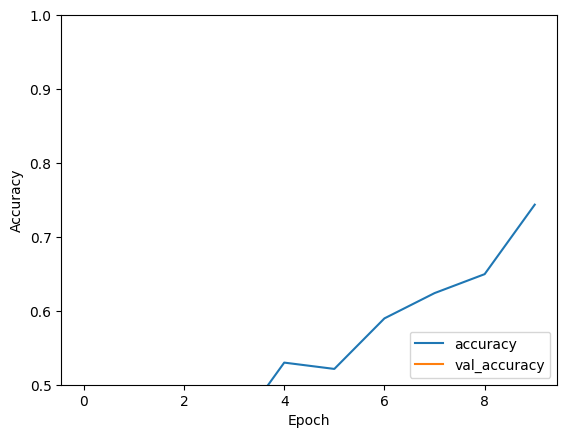

In [853]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [854]:
# Save ethe model

model.save('my_model2.h5')  # creates a HDF5 file 'my_model2.h5'




In [855]:
#load the model

model = keras.models.load_model('my_model2.h5')


In [856]:
model.evaluate(test_images,test_labels, verbose=2)

1/1 - 0s - loss: 0.6867 - accuracy: 0.5000 - 62ms/epoch - 62ms/step


[0.6867178678512573, 0.5]

In [857]:
test_loss,test_acc = model.evaluate(test_images, test_labels, verbose=2)

print("Accuracy is ", test_acc)

1/1 - 0s - loss: 0.6867 - accuracy: 0.5000 - 11ms/epoch - 11ms/step
Accuracy is  0.5


In [858]:
prediction=model.predict(imagesToPredict)


1/1 [==============================] - 0s 32ms/step


In [859]:
prediction[0]

array([11.671518 , 11.733394 , 10.5478735, -2.1766312], dtype=float32)

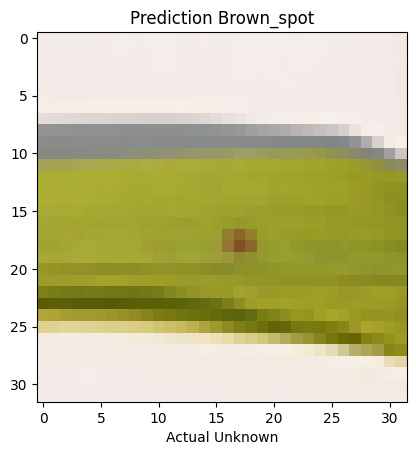

In [860]:

plt.grid(False)
plt.imshow(imagesToPredict[0])

plt.xlabel("Actual "+ class_names[imagesToPredictLabels[0]])
plt.title("Prediction "+ class_names[np.argmax(prediction[0])])
plt.show()




In [861]:
len(imagesToPredict)

1

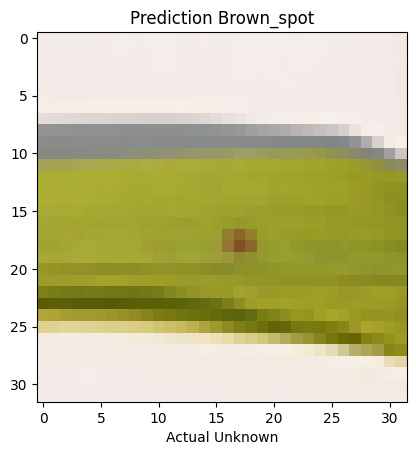

In [862]:
for i in range(len(imagesToPredict)):
    plt.grid(False)
    plt.imshow(imagesToPredict[i], cmap=plt.cm.binary)
    plt.xlabel("Actual "+ class_names[imagesToPredictLabels[i]])
    plt.title("Prediction "+ class_names[np.argmax(prediction[i])])
    plt.show()